# [ANALISIS PEFORMA AKADEMIK SISWA]
(Dataset : student acedemic peformance (kaggle) , https://www.kaggle.com/datasets/sonalshinde123/student-academic-performance-dataset?resource=download)

## [NAMA KELOMPOK]
1. Arya Kurniawan
2. Muhammad Rafi Ramdhani
3. Maeyumedi Davi

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                            confusion_matrix, r2_score, mean_squared_error,
                            mean_absolute_error)



In [29]:
df_students = pd.read_csv("student_perform.csv" , delimiter=","  , header="infer")
passes = pd.Series(df_students['Final Exam Marks (out of 100)'] >= 60)
df_students = pd.concat([df_students , passes.rename("Pass")] , axis=1)
df_students.head()

,Student_ID,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100),Pass
0,S1000,84,30,36,7,3,72,True
1,S1001,91,24,38,6,3,56,False
2,S1002,73,29,26,7,3,56,False
3,S1003,80,36,35,7,3,74,True
4,S1004,84,31,37,8,3,66,True


In [12]:
df_students.describe()

,Attendance (%),Internal Test 1 (out of 40),Internal Test 2 (out of 40),Assignment Score (out of 10),Daily Study Hours,Final Exam Marks (out of 100)
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,84.891500,32.115500,32.464500,7.507000,2.823500,64.855000
std,7.758855,4.563504,4.522827,1.021015,0.608714,11.341265
min,52.000000,18.000000,16.000000,4.000000,1.000000,25.000000
25%,80.000000,29.000000,29.000000,7.000000,2.000000,58.000000
50%,85.000000,32.000000,33.000000,8.000000,3.000000,65.000000
75%,90.000000,35.000000,36.000000,8.000000,3.000000,73.000000
max,100.000000,40.000000,40.000000,10.000000,5.000000,100.000000


In [13]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Attendance (%)                 2000 non-null   int64
 1   Internal Test 1 (out of 40)    2000 non-null   int64
 2   Internal Test 2 (out of 40)    2000 non-null   int64
 3   Assignment Score (out of 10)   2000 non-null   int64
 4   Daily Study Hours              2000 non-null   int64
 5   Final Exam Marks (out of 100)  2000 non-null   int64
 6   Pass                           2000 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 95.8 KB


In [14]:
corr = df_students.corr()
print(corr)

                               Attendance (%)  Internal Test 1 (out of 40)  \
Attendance (%)                       1.000000                     0.505033   
Internal Test 1 (out of 40)          0.505033                     1.000000   
Internal Test 2 (out of 40)          0.494560                     0.263400   
Assignment Score (out of 10)         0.432373                     0.568047   
Daily Study Hours                    0.298767                     0.213539   
Final Exam Marks (out of 100)        0.725644                     0.689227   
Pass                                 0.550203                     0.542309   

                               Internal Test 2 (out of 40)  \
Attendance (%)                                    0.494560   
Internal Test 1 (out of 40)                       0.263400   
Internal Test 2 (out of 40)                       1.000000   
Assignment Score (out of 10)                      0.541970   
Daily Study Hours                                 0.225670   
Fin

In [42]:
grades = df_students["Final Exam Marks (out of 100)"]

print("mean : " , np.mean(grades))
print("median : " , np.median(grades))
print("mode : " , stats.mode(grades))
print("var : " , np.var(grades))
print("std : " , np.std(grades))

mean :  64.855
median :  65.0
mode :  ModeResult(mode=np.int64(66), count=np.int64(82))
var :  128.55997499999998
std :  11.33842912400126


<Axes: xlabel='Student_ID'>

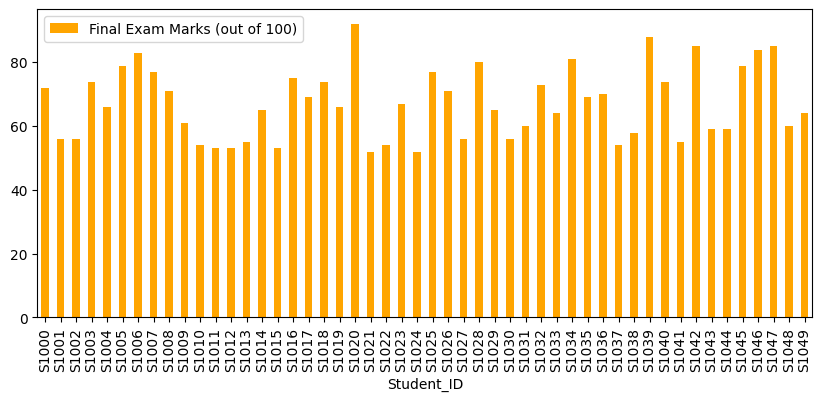

In [17]:
df_plot = df_students.head(50)
df_plot.plot.bar(x="Student_ID" , y="Final Exam Marks (out of 100)" , figsize=(10,4), color="orange")

C:\Users\rafi\AppData\Local\Temp\ipykernel_22500\3965799267.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students["Student_ID"] , rotation=90)


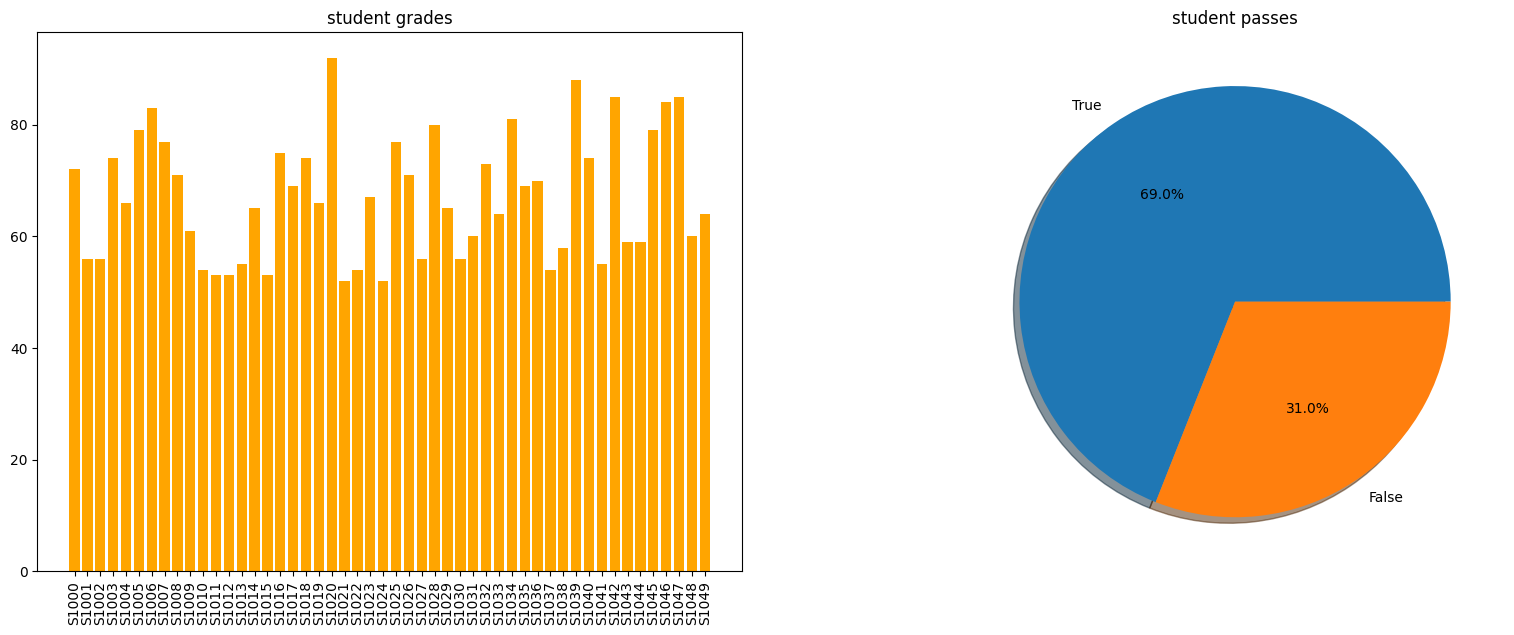

In [41]:
fig , ax = plt.subplots(1,2,figsize=(20,7))
delimiter = df_students.head(50)
ax[0].bar(x=delimiter["Student_ID"] , height=delimiter["Final Exam Marks (out of 100)"] , color='orange')

ax[0].set_title("student grades")
ax[0].set_xticklabels(df_students["Student_ID"] , rotation=90)

passes_count = df_students["Pass"].value_counts()
ax[1].pie(passes_count , labels=passes_count.index , autopct="%1.1f%%" , shadow=True)
ax[1].set_title("student passes")
plt.show()

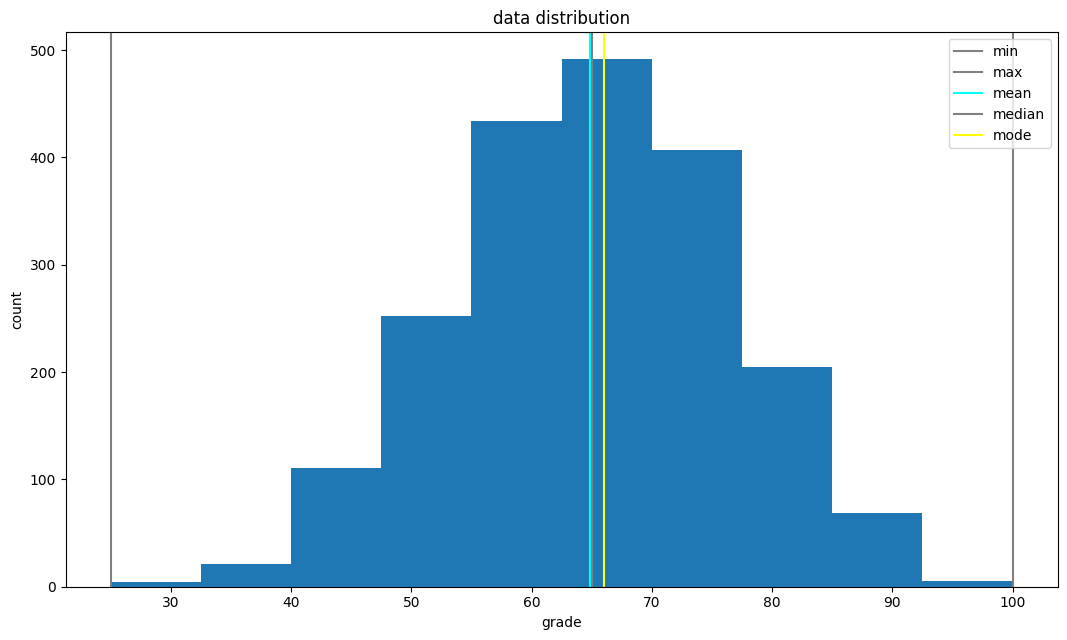

In [43]:
grades = df_students["Final Exam Marks (out of 100)"]

min_val = df_students['Final Exam Marks (out of 100)'].min()
max_val = df_students['Final Exam Marks (out of 100)'].max()
meam_val = df_students['Final Exam Marks (out of 100)'].mean()
mad_val = df_students['Final Exam Marks (out of 100)'].median()
mode_val = df_students['Final Exam Marks (out of 100)'].mode()[0]

fig = plt.figure(figsize=(12.8,7.2))

plt.hist(grades)

plt.axvline(x=min_val , color="gray" , label="min")
plt.axvline(x=max_val , color="gray" , label="max")
plt.axvline(x=meam_val , color="cyan" , label="mean")
plt.axvline(x=mad_val , color="gray" , label="median")
plt.axvline(x=mode_val , color="yellow" , label="mode")

plt.title("data distribution")
plt.legend()
plt.xlabel("grade")
plt.ylabel("count")

plt.show()


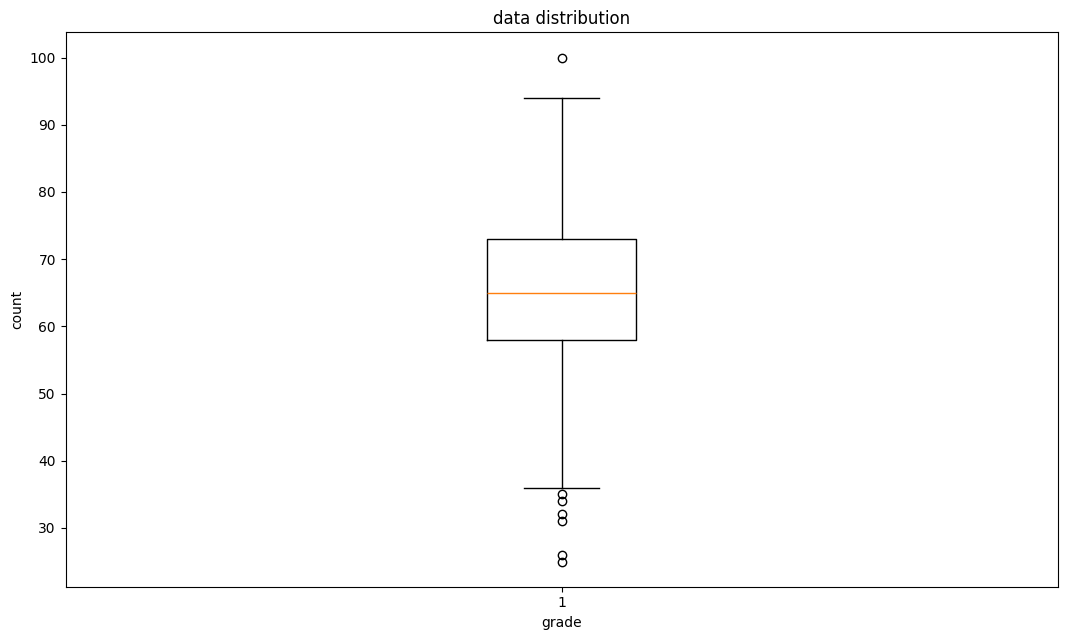

In [44]:
grades = df_students["Final Exam Marks (out of 100)"]

fig = plt.figure(figsize=(12.8,7.2))

plt.boxplot(grades)

plt.title("data distribution")
plt.xlabel("grade")
plt.ylabel("count")

plt.show()

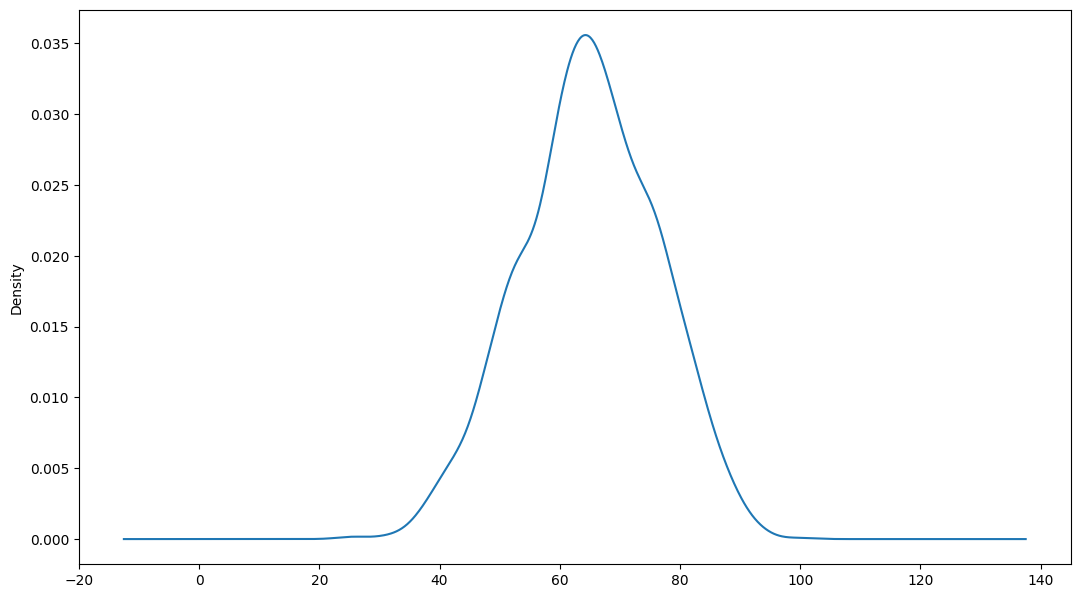

In [45]:
def show_density(data):
    plt.figure(figsize=(12.8,7.2))
    
    data.plot.density()
    
    plt.show()
show_density(df_students['Final Exam Marks (out of 100)'])

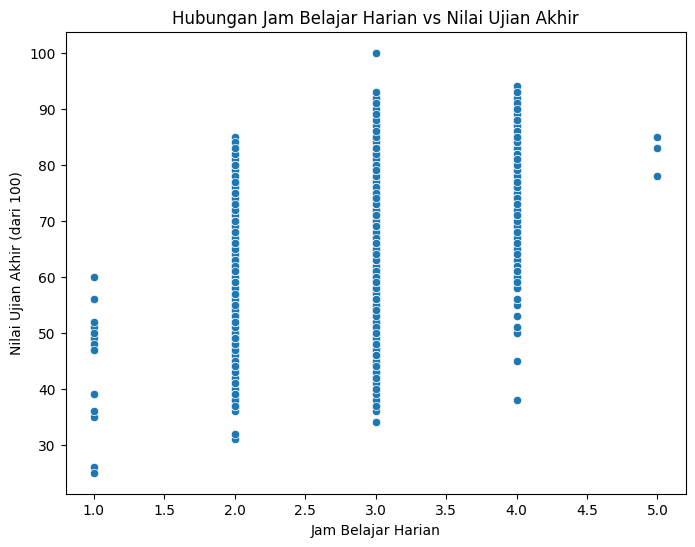

In [50]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Daily Study Hours', y='Final Exam Marks (out of 100)', data=df_students)
plt.title('Hubungan Jam Belajar Harian vs Nilai Ujian Akhir')
plt.xlabel('Jam Belajar Harian')
plt.ylabel('Nilai Ujian Akhir (dari 100)')
plt.show()

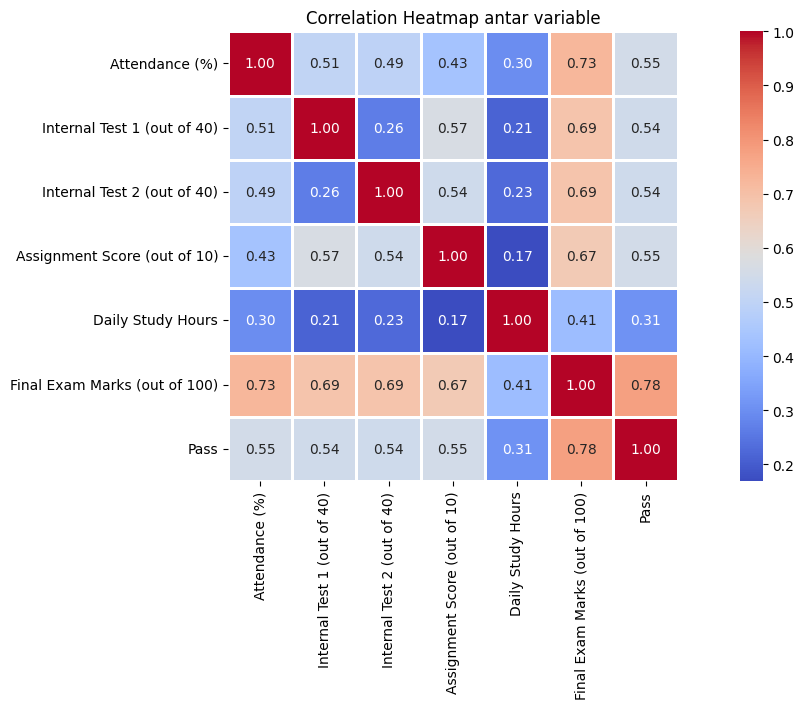

In [28]:
plt.figure(figsize=(12.8,7.2))
sns.heatmap(corr, annot=True , fmt='.2f' , cmap='coolwarm' , square=True , linewidths=1)
plt.title("Correlation Heatmap antar variable")
plt.tight_layout()
plt.show()

In [19]:
X = df_students.drop(columns=['Final Exam Marks (out of 100)'])
Y = df_students['Final Exam Marks (out of 100)']

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [20]:
model1 = LinearRegression()
model1.fit(X_train , Y_train)
pred1 = model1.predict(X_test)
print("LR R2:" , r2_score(Y_test , pred1))
print("LR MAE:" , np.sqrt(mean_squared_error(Y_test , pred1)))

LR R2: 0.8582198281491425
LR MAE: 4.213858734541314


In [21]:
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(X_train , Y_train)
pred2 = model2.predict(X_test)
print("RF R2:" , r2_score(Y_test , pred2))
print("RF MAE:" , np.sqrt(mean_squared_error(Y_test , pred2)))

RF R2: 0.8383706510537149
RF MAE: 4.49916929152175


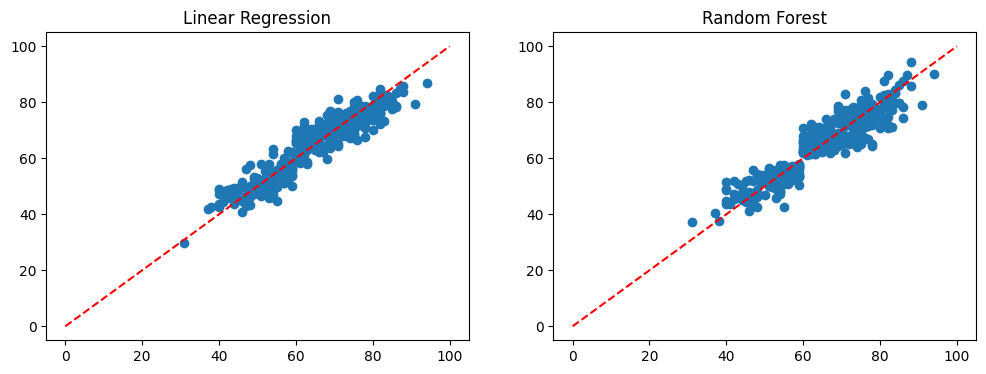

In [22]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(Y_test, pred1)
plt.plot([0, 100], [0, 100], 'r--')
plt.title('Linear Regression')

plt.subplot(1,2,2)
plt.scatter(Y_test, pred2)
plt.plot([0, 100], [0, 100], 'r--')
plt.title('Random Forest')

plt.show()

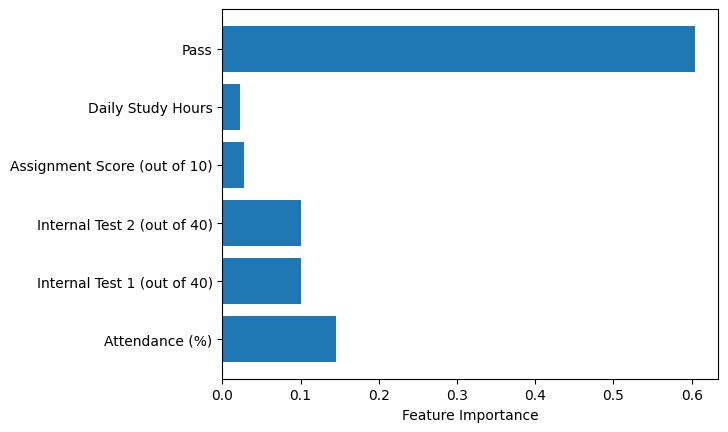

In [48]:
importance = model2.feature_importances_
features = X.columns

plt.barh(features, importance)
plt.xlabel('Feature Importance')
plt.show()